In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

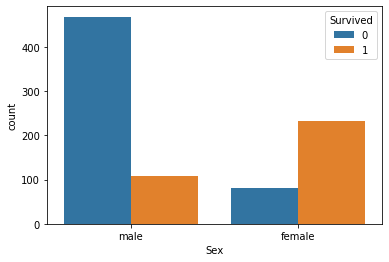

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot('Sex',hue='Survived',data=df)

In [3]:
from sklearn.model_selection import train_test_split
#欠損値処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

#カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
train_X = df.drop('Survived', axis=1)
train_y = df.Survived
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=4)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [18]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.8097014925373134

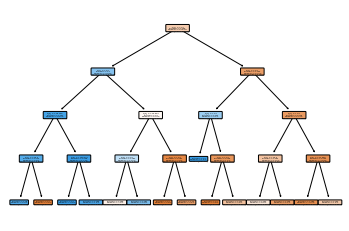

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(clf,
              #feature_names=train_X.columns,
              #class_names='t',
              filled=True, rounded=True, proportion=True)
plt.savefig("tree1.4.png")

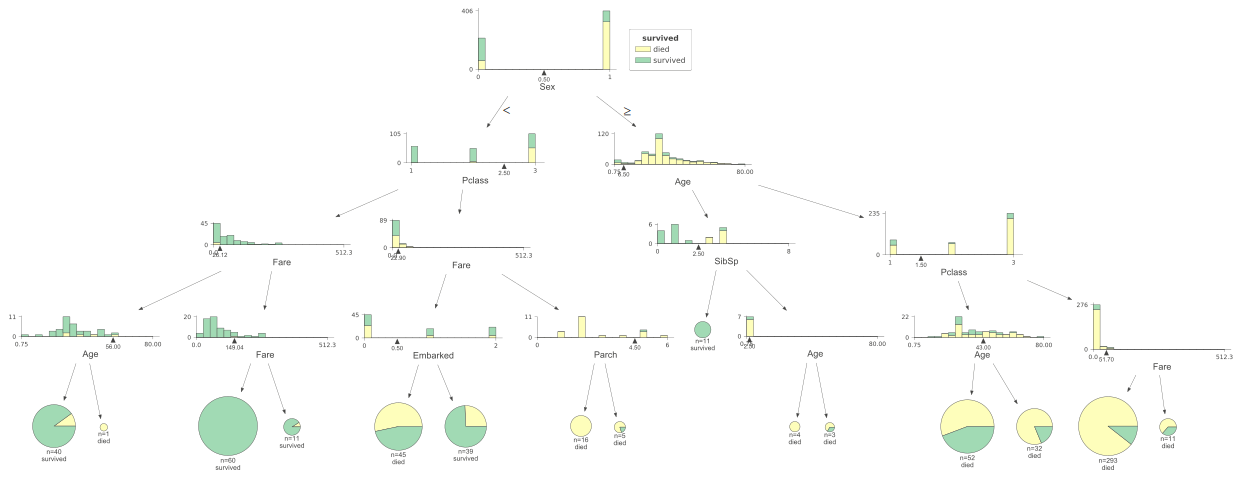

In [33]:
from dtreeviz.trees import dtreeviz
class_names = ["died","survived"]
viz = dtreeviz(
    clf,
    train_X, 
    train_y,
    target_name='survived',
    feature_names=train_X.columns,
    class_names=[str(i) for i in class_names]
) 
 
display(viz)

In [27]:
!pip install dtreeviz

  Stored in directory: C:\Users\Shibuya Ryo\AppData\Local\pip\Cache\wheels\d8\74\06\0d9d450156c7cb2f1fcfb51a55b1542d26f459f557d742c406
Successfully built dtreeviz
